![](fig/logoENSI.png)
 ![](fig/logoPython.png)
***
# TP7
Compte-rendu de 

# Les tris
***
**ENSICAEN  1A MC** 
 2023-2024

## Eric Ziad-Forest
***

**Auteur :**

- Eric Ziad-Forest [ziad@ensicaen.fr]
- Christine Porquet [chris@ensicaen.fr]
***
*Contenu sous licence [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0)*

# Préliminaires

L'art de l'algorithmique consiste à trouver les algorithmes les plus performants. En général il s'agit des plus rapides, mais cela peut aussi être les moins gourmands en mémoire ou ceux qui se parallélisent le mieux. On peut aussi se focaliser sur le comportement moyen de l'algorithme ou son comportement dans le pire des cas.

Nous aurons besoin dans cette première partie d'une fonction donnant des nombres aléatoires c'est la fonction `randrange()` (ou son alias `randint()` ) de la bibliothèque `random`, elle renvoie un nombre entier aléatoire entre 0 et N.
        
https://docs.python.org/fr/3/library/random.html

#### Documentation
Plus généralement une documentation Python est accessible à
    https://docs.python.org/fr/3/ ,
    ou encore le tutoriel à https://docs.python.org/fr/3/tutorial/index.html

In [110]:
# importation de bibliothèques
import numpy as np
# la fonction de tri sort est définie dans la bibliothèque numpy
from numpy import sort  

In [111]:
import random as rnd
N = 10
donnees = [rnd.randrange(N) for i in range(N)] 
# notez la facon d'utiliser la boucle for dans la liste
print(donnees)
print(sort(donnees)) # pas besoin de np.sort car: from numpy import sort

[3, 3, 4, 7, 5, 2, 0, 5, 2, 0]
[0 0 2 2 3 3 4 5 5 7]


Notez que le résultat n'est pas une liste mais un tableau de Numpy. Cela est dû au fait que la fonction `sort` utilisée vient de la bibliothèque Numpy.

In [112]:
type(sort(donnees))

numpy.ndarray

> Comme, nous aurons besoin par la suite de la liste `donnees` avec d'autres valeurs de N,
faite en une fonction de N

# Les Tris

## Tri à bulle

Le pseudo-code suivant est repris du livre de: *Knuth*.

`tri_bulles(Tableau T)                 
   pour i allant de (taille de T)-1 à 1
       pour j allant de 0 à i-1      
           si T[j+1] < T[j]            
               échanger(T[j+1], T[j])     `


1/  Comment echanger rapidement en `Python` les variables x et y?

2/ Implémenter en Python l'algorithme ci-dessus:

Une optimisation courante de ce tri consiste à l'interrompre dès qu'un parcours des éléments possiblement encore en désordre (boucle interne) est effectué sans échange. En effet, cela signifie que tout le tableau est trié. Cette optimisation nécessite une variable supplémentaire.

`tri_bulles_optim(Tableau T)             
    pour i allant de (taille de T)-1 à 1
        tableau_trié := vrai            
        pour j allant de 0 à i-1      
            si T[j+1] < T[j]            
                échanger(T[j+1], T[j])  
                tableau_trié := faux    
        si tableau_trié                 
            fin tri_à_bulles_optimisé   `

3/ Implémenter en Python, ce nouvel algorithme plus performant:

In [13]:
def tri_bulles_optim(T):
    n = len(T)
    for i in range(n - 1, 0, -1):  # Correction de la boucle externe
        tableau_trié = True
        for j in range(i):
            if T[j + 1] < T[j]:
                T[j + 1], T[j] = T[j], T[j + 1]
                tableau_trié = False
        if tableau_trié:
            return T # Fin du tri si le tableau est déjà trié
    return T

4/ Lancer les 2 algorithmes précédents avec pour tableau T, la liste `donnees`  avec N = 1000

In [14]:
T=tri_bulles_optim([1,4,2])

In [15]:
print(T)

[1, 2, 4]


## Temps d'execution

Pour vérifier, la rapidité d'execution, nous allons chronométrer vos programmes avec la fonction `time()` de la bibliothèque `time` de Python.

Exemple d'utilisation

In [1]:
def f():
    res = 0
    for i in range(10000):
        res += i**3.4

In [2]:
import time 
start = time.time()# début du chrono
f()
end = time.time() # fin du chrono  
end - start # temps réaliser

0.0015549659729003906

Mais il est plus simple et plus précis d'utiliser la commande magique `%timeit` d'iPython :

In [3]:
%timeit f()# Patience, attendre quelques secondes...

1.27 ms ± 15.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Vos remarques:
    

5/ Comparer la rapidité des 2 tris bulles précédents

## Tri rapide (Quicksort)

Référence pour la définition: http://fr.wikipedia.org/wiki/Quicksort

In [ ]:
def trirapide(L):
    """trirapide(L): tri rapide (quicksort) de la liste L"""
    def trirap(L, g, d):
        
        pivot = L[(g + d) // 2]
        i = g
        j = d
        while True:
            while L[i] < pivot:
                i += 1
            while L[j] > pivot:
                j -= 1
            if i >= j:
                break
            L[i], L[j] = L[j], L[i]
            i += 1
            j -= 1
        if g < j:
            trirap(L, g, j)
        if i < d:
            trirap(L, i, d)

    g = 0
    d = len(L) - 1
    trirap(L, g, d)
    return L  # Return liste triée

# Example usage:
unsorted_list = [3, 6, 8, 10, 1, 2, 1]
sorted_list = trirapide(unsorted_list)
print("Sorted List:", sorted_list)


In [17]:
def trirapide(L):
    """trirapide(L): tri rapide (quicksort) de la liste L"""
    def trirap(L, g, d):
        if g < d:
            pivot = L[(g + d) // 2]
            i, j = g, d
            while True:
                while L[i] < pivot:
                    i += 1
                while L[j] > pivot:
                    j -= 1
                if i >= j:
                    break
                L[i], L[j] = L[j], L[i]
                i += 1
                j -= 1
            trirap(L, g, j)
            trirap(L, j + 1, d)

    # Créer une copie de la liste pour ne pas modifier l'originale
    copied_list = list(L)
    trirap(copied_list, 0, len(copied_list) - 1)
    return copied_list  # Retourne une nouvelle liste triée

# Example usage:
unsorted_list = [3, 6, 8, 10, 1, 2, 1]
sorted_list = trirapide(unsorted_list)
print("Sorted List:", sorted_list)

Sorted List: [1, 1, 2, 3, 6, 8, 10]


6/ Expliquer comment fonctionne ce tri.

7/ Quel est le temps d'execution de ce tri rapide  avec le tableau `donnees` (vu au début de ce TP) et avec toujours N = 1000. 

8/ Qu'en déduisez-vous?

## Comparaison graphique d'algorithme de tri

On va chercher à mesurer les performances sur un même jeu de valeurs de ces différents algorithmes.

Ecrire un programme qui :
    - Initialise trois tableaux identiques de  N valeurs obtenues à l'aide des fonctions de la bibliothèque random;
    - Triez chacun des tableaux avec chaque algorithme implémenté ci-dessus ;
    - Mesurez le temps d'exécution de chacun de ces algorithmes à l'aide de time(). 
    - Effectue également ces mesures de durée de calcul pour des tableaux dont les éléments se présentent dans l'ordre exactement inverse à l'ordre voulu.(notion de pire cas)
Vous réaliserez les mesures avec N = 10, 100, 1000, 10000, 100000 , (10**6 si vous avez un peu de temps...) 

A partir des résultats produits vous réalisez des tracés sous forme de graphiques avec l'aide de `mathplotlib`
afin d’illustrer les complexités de ces différents algorithmes pour les deux types d’organisation (ordre aléatoire, ordre inverse) des valeurs dans ces tableaux.  

Les courbes produites devront être présentes dans le compte-rendu avec les valeurs ayant servies à la réalisation des tracés.

### Quelques révision sur `matplotlib`

Vous pouvezconsulter: https://www.courspython.com/introduction-courbes.html

In [ ]:
# 1ère posibilité
# import pylab 
# La syntaxe « PyLab » est proche de celle du logiciel Matlab

In [4]:
# 2d possibilité
# Classique avec matplotlib
import numpy
import matplotlib.pyplot as plt

# Décocher le # de ce que vous souhaitez ci-dessous

# Pour voir les figures dans le notebook
#%matplotlib inline

# En revanche, pour voir les graphiques dans une fenêtre externe
#%matplotlib notebook

### Exemple d'utilisation de `matplotlib`

In [5]:
# une fonction quelconque pour illustrer l'utilisation de matplotlib
def f2(x,N):
    res = 0
    for i in range(N):
        res += 1/x**2
    return res

# Valeurs pour les axes des abscisses
X=numpy.linspace(2,12,100)
X_2=[i for i in range(2,12)]
# les images Y et Y_2 par la fonction f2 des valeurs sur les axes des abscisses X et X_2
Y=[f2(x,50) for x in X]
Y_2=[f2(x,50) for x in X_2]

In [6]:
type(X),type(Y) #remarquer la différence de type

(numpy.ndarray, list)

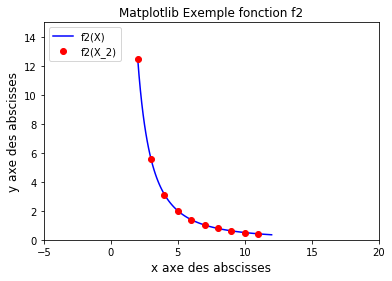

In [7]:
# Titre du graphique
plt.title('Matplotlib Exemple fonction f2')

# pour donner des nom aux axes
plt.xlabel('x axe des abscisses', fontsize=12)
plt.ylabel('y axe des abscisses', fontsize=12)

# limite pour les axes
plt.xlim(-5.0, 20.0)
plt.ylim(0.0, 15.0)

# tracer des 2 courbes avec nom pour la legende
plt.plot(X, Y, '-b', label='f2(X)')
plt.plot(X_2, Y_2, 'or', label='f2(X_2)')

# legende
plt.legend(loc='upper left')

# Taille du graphique
plt.figure(1, figsize=(50,25))

# sauvegarde dans votre dossier de travail
plt.savefig('Exemple_f2.png', bbox_inches='tight')

Pour en savoir plus sur les "marker" et les couleurs
https://www.courspython.com/introduction-courbes.html#symbole-marker
et les couleurs
https://www.courspython.com/introduction-courbes.html#couleur

Ou enfin voir page 4 de la fiche *memento_python_3* sur moodle

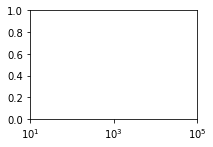

In [8]:
# Vous pourriez avoir bien besoin des 2 instructions suivantes:
# Changement de la taille du graphique
plt.figure(1, figsize=(3,2))
# Les limites de l'axe des abscices
plt.xlim(10.0,10.0**5)
# Echelle logarithmique
plt.xscale('log')

### Votre travail afin de comparer les différents algorithme de tris

## Implémentation de quelques autres algorithmes de tris.  

### Tri par sélection 

 **Algorithme** 
``` algo
procédure tri_selection(tableau t)
      n ← longueur(t) 
      pour i de 0 à n - 2
          min ← i       
          pour j de i + 1 à n - 1
              si t[j] < t[min], alors min ← j
          fin pour
          si min ≠ i, alors échanger t[i] et t[min]
      fin pour
fin procédure
```                                     

9/ Ecrire une fonction pour cet algorithme de tri

In [ ]:
def tri_selection(t):
    n = len(t)
    for i in range(n - 1):
        min_index = i
        for j in range(i + 1, n):
            if t[j] < t[min_index]:
                min_index = j
        if min_index != i:
            t[i], t[min_index] = t[min_index], t[i]

# Exemple d'utilisation :
tableau = [64, 25, 12, 22, 11]
tri_selection(tableau)
print("Tableau trié :", tableau)


### Tri par insertion

*Ici une autre manière d’écrire un  Algorithme*

```
procédure tri_insertion(tableau T, entier n)
      pour i de 1 à n - 1
          	 #mémoriser la valeur de T[i]
          x ← T[i]
          	 #déplacer d'un cran  vers la droite les éléments de 
			 #T[0]..T[i-1] qui sont plus grands que lui en partant de T[i-1]
          j ← i
          tant que j > 0 et T[j - 1] > x
              T[j] ← T[j - 1]
              j ← j - 1
          fin tant que
          	 # mettre la valeur dans le "trou" que ça a laissé
          T[j] ← x
     fin pour
  fin procédure
 ```

10/ Ecrire une fonction pour cet algorithme de tri

12/ Faire de nouveau une comparaison graphique, avec désormais tous les tris vu ci-dessus.
*avec des listes d'entiers de tailles N = 10, 100, 1000, 10000, 100000*